# Dataset
The datasets from year 2006 to 2016 is downloaded from Cricksheet and the 2017 data was fetched manually from [HowzStat](http://www.cricket-stats.net/w3/ausind2017Btour.shtml) and saved into excel 2017_ODI.xlsx.  
The dataset comes from [Cricsheet](https://cricsheet.org/), and it is related to One Day Internation matches for all male players, it is in the yaml format. The classification goal is to analyse the data only for India and Australia and to predict who win the Coming ODI between Australia and India.  
The dataset can be downloaded from [here](https://cricsheet.org/downloads/odis_male.zip)

In [2]:
import glob
import pandas as pd
import yaml

path =r'E:\Hackathron\India_VS_Australia\odis_male' # use your path
allFiles = glob.glob(path + "/*.yaml")

list_ = []

for file_ in allFiles:
    with open(file_, 'r') as stream:
        try:
            ODI = yaml.load(stream)
        except yaml.YAMLError as exc:
            print(exc)
    if 'INDIA' in [x.strip().upper() for x in ODI['info']['teams']] and 'AUSTRALIA' in [x.strip().upper() for x in ODI['info']['teams']]:
        team = []
        batsman = []
        bowler = []
        batsman_runs = []
        extra_runs = []
        total_runs = []
        fielder = []
        outby = []
        player_out = []
        wicket = []
        sixes = []
        fours = []
        innings = []
        for i, j in enumerate(ODI['innings']):
            for k in ODI['innings'][i]:
                for l,m in enumerate(ODI['innings'][i][k]['deliveries']):
                    for n in list(ODI['innings'][i][k]['deliveries'][l].keys()):
                        innings.append(k)
                        team.append(ODI['innings'][i][k]['team'])
                        batsman.append(ODI['innings'][i][k]['deliveries'][l][n]['batsman'])
                        bowler.append(ODI['innings'][i][k]['deliveries'][l][n]['bowler'])
                        batsman_runs.append(ODI['innings'][i][k]['deliveries'][l][n]['runs']['batsman'])
                        extra_runs.append(ODI['innings'][i][k]['deliveries'][l][n]['runs']['extras'])
                        total_runs.append(ODI['innings'][i][k]['deliveries'][l][n]['runs']['total'])
                        try:
                            fielder.append(ODI['innings'][i][k]['deliveries'][l][n]['wicket']['fielders'][0])
                            outby.append(ODI['innings'][i][k]['deliveries'][l][n]['wicket']['kind'])
                            player_out.append(ODI['innings'][i][k]['deliveries'][l][n]['wicket']['player_out'])
                            wicket.append(1)
                        except:
                            fielder.append("None")
                            outby.append("None")
                            player_out.append("None")
                            wicket.append(0)
                        if ODI['innings'][i][k]['deliveries'][l][n]['runs']['batsman'] == 6:
                            sixes.append(1)
                        else:
                            sixes.append(0)
                        if ODI['innings'][i][k]['deliveries'][l][n]['runs']['batsman'] == 4:
                            fours.append(1)
                        else:
                            fours.append(0)
        ODI_International = {'Innings': innings,
                        'Team': team,
                        'Batsman': batsman,
                        'Bowler': bowler,
                        'Batsman_Runs': batsman_runs,
                        'Extra_Runs': extra_runs,
                        'Total_Runs': total_runs,
                        'Fielder': fielder,
                        'OutBy': outby,
                        'Player_Out': player_out,
                        'Wicket': wicket,
                        'Sixes': sixes,
                        'Fours': fours}
        data = pd.DataFrame.from_dict(ODI_International)
        df = data.groupby(['Innings','Team','Batsman','Bowler','OutBy','Fielder','Player_Out'],as_index=False).sum()
        try:
            df['City'] = ODI['info']['city']
        except:
            df['City'] = ODI['info']['venue'].split(" ")[0]
        df['Dates'] =  ODI['info']['dates'][0]
        try:
            df['Winner'] =  ODI['info']['outcome']['winner']
        except:
            df['Winner'] = "No Result"
        try:
            df['Man Of The Match'] = ODI['info']['player_of_match'][0]
        except:
            df['Man Of The Match'] = "No One"
        df['Toss_Decision'] = ODI['info']['toss']['decision']
        df['Toss_Winner'] =  ODI['info']['toss']['winner']
        df['Venue'] =  ODI['info']['venue']
        list_.append(df)
        
frame = pd.concat(list_, axis = 0, ignore_index = True)

In [3]:
# frame.to_excel("India_Australia_ODI.xlsx", index = False)


In [241]:
# Now lets Import the necessary libraries
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [242]:
import pandas as pd

# Now we will also load the 2017 data frome excel

ODI_2017 = pd.read_excel("2017_ODI.xlsx")
frame = pd.read_excel("India_Australia_ODI.xlsx")

print(frame.shape)
print(list(frame.columns))

(2859, 20)
['Innings', 'Team', 'Batsman', 'Bowler', 'OutBy', 'Fielder', 'Player_Out', 'Batsman_Runs', 'Extra_Runs', 'Total_Runs', 'Wicket', 'Sixes', 'Fours', 'City', 'Dates', 'Winner', 'Man Of The Match', 'Toss_Decision', 'Toss_Winner', 'Venue']


In [243]:
# Now we will append both the data sets into one

RawDataSets = frame.append(ODI_2017)

### After converting the yaml data to dataframe we get 20 columns and 2859 rows, each row is the aggregation on categorical columns and it represend each bowl score which is aggregated in the data  
### now lets check the data which we have extracted to get a hang of it

In [244]:
RawDataSets.shape

(3004, 20)

### Now lets discuss the input variuable, most of the variable are self explanatory, let discuss some Batsman, bowler, outby, fielder and player out are some of the columns that are aggregated  
### For example - when batsman "D Mongia" is batting and he has faced bowler "GD McGrath" how many run he made, wicket and etc, so basically it's a aggregation of all the bowls faced by "D Mongia" when "GD McGrath" is bowling

### Predict variable (desired target):
### Winner — It is a categorical variable which holds the value of team name who has win the match  
### Data exploration  
we see that the data is still not in the correct format for analysis, since some of the columns are increasing the rowns so for our analysis purpose we will take the subset of data for answering the 1st questions winner of the series

In [245]:
ODI_Outcome = RawDataSets.loc[:,['Innings', 'Team', 'Batsman_Runs', 'Extra_Runs', 'Total_Runs', 'Wicket',
       'Sixes', 'Fours', 'City', 'Dates', 'Winner', 'Man Of The Match',
       'Toss_Decision', 'Toss_Winner', 'Venue']]

In [246]:
# for this we need to aggregate the data based on below columns

Aggre_ODI = ODI_Outcome.groupby(['Innings','Team','City','Dates','Winner','Man Of The Match','Toss_Decision','Toss_Winner','Venue'],as_index=False).sum()

Aggre_ODI.describe()

,Batsman_Runs,Extra_Runs,Total_Runs,Wicket,Sixes,Fours
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,238.329787,13.297872,251.627660,5.191489,4.808511,21.265957
std,179.386792,8.514163,179.688439,5.114341,8.063293,14.513009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,162.250000,8.000000,193.250000,3.000000,1.000000,14.250000
50%,240.500000,12.500000,256.500000,5.000000,3.000000,22.000000
75%,288.500000,18.750000,305.500000,7.000000,6.000000,27.000000
max,1339.000000,39.000000,1339.000000,38.000000,69.000000,99.000000


In [247]:
# now lets see the data which we have aggregated above

Aggre_ODI = Aggre_ODI.sort_values(by=['Dates','Innings'])

In [248]:
Aggre_ODI.head()

,Innings,Team,City,Dates,Winner,Man Of The Match,Toss_Decision,Toss_Winner,Venue,Batsman_Runs,Extra_Runs,Total_Runs,Wicket,Sixes,Fours
15,1st innings,Australia,Kuala Lumpur,2006-09-16,No Result,No One,bat,Australia,Kinrara Academy Oval,234,10,244,10,4,24
77,2nd innings,India,Kuala Lumpur,2006-09-16,No Result,No One,bat,Australia,Kinrara Academy Oval,27,8,35,4,1,3
16,1st innings,Australia,Kuala Lumpur,2006-09-22,Australia,B Lee,bat,Australia,Kinrara Academy Oval,194,19,213,8,6,15
78,2nd innings,India,Kuala Lumpur,2006-09-22,Australia,B Lee,bat,Australia,Kinrara Academy Oval,168,27,195,5,2,11
36,1st innings,India,Chandigarh,2006-10-29,Australia,DR Martyn,bat,India,"Punjab Cricket Association Stadium, Mohali",231,18,249,5,0,27


In [249]:
# now to analyse each ODI matched we don't recquired bowl level information, so we will create a new data wits with only below columns:

# we need to create a new column for innings and team

Aggre_ODI["Team_Innings"] = Aggre_ODI["Innings"] +"_"+ Aggre_ODI["Team"]

ODI_Analysis = pd.get_dummies(Aggre_ODI[['Team_Innings']])

In [250]:
# Now we have data in the format where if we aggregate we don't lose the innings information

ODI_Analysis.head()

,Team_Innings_1st innings_Australia,Team_Innings_1st innings_India,Team_Innings_2nd innings_Australia,Team_Innings_2nd innings_India
15,1,0,0,0
77,0,0,0,1
16,1,0,0,0
78,0,0,0,1
36,0,1,0,0


In [251]:
# now lets join the data with the original data and lets see if every thing is coming accurate

ODI_Join = Aggre_ODI.join(ODI_Analysis)

ODI_Join.head()

,Innings,Team,City,Dates,Winner,Man Of The Match,Toss_Decision,Toss_Winner,Venue,Batsman_Runs,Extra_Runs,Total_Runs,Wicket,Sixes,Fours,Team_Innings,Team_Innings_1st innings_Australia,Team_Innings_1st innings_India,Team_Innings_2nd innings_Australia,Team_Innings_2nd innings_India
15,1st innings,Australia,Kuala Lumpur,2006-09-16,No Result,No One,bat,Australia,Kinrara Academy Oval,234,10,244,10,4,24,1st innings_Australia,1,0,0,0
77,2nd innings,India,Kuala Lumpur,2006-09-16,No Result,No One,bat,Australia,Kinrara Academy Oval,27,8,35,4,1,3,2nd innings_India,0,0,0,1
16,1st innings,Australia,Kuala Lumpur,2006-09-22,Australia,B Lee,bat,Australia,Kinrara Academy Oval,194,19,213,8,6,15,1st innings_Australia,1,0,0,0
78,2nd innings,India,Kuala Lumpur,2006-09-22,Australia,B Lee,bat,Australia,Kinrara Academy Oval,168,27,195,5,2,11,2nd innings_India,0,0,0,1
36,1st innings,India,Chandigarh,2006-10-29,Australia,DR Martyn,bat,India,"Punjab Cricket Association Stadium, Mohali",231,18,249,5,0,27,1st innings_India,0,1,0,0


In [252]:
# now lets remove the Innings , Team and Team_Innings column and then aggregate the data

ODI_Final = ODI_Join.drop(columns=['Innings','Team','Team_Innings','Batsman_Runs','Extra_Runs','Total_Runs','Wicket','Sixes','Fours'])

In [253]:
# Now lets aggreagte the data and see the final data

Final_ODI = ODI_Final.groupby(['City','Dates','Winner','Man Of The Match','Toss_Decision','Toss_Winner','Venue'],as_index=False).sum()

print(Final_ODI.shape)

Final_ODI.head()

(48, 11)


,City,Dates,Winner,Man Of The Match,Toss_Decision,Toss_Winner,Venue,Team_Innings_1st innings_Australia,Team_Innings_1st innings_India,Team_Innings_2nd innings_Australia,Team_Innings_2nd innings_India
0,Adelaide,2008-02-17,Australia,MJ Clarke,bat,Australia,Adelaide Oval,1,0,0,1
1,Adelaide,2012-02-12,India,G Gambhir,bat,Australia,Adelaide Oval,1,0,0,1
2,Ahmedabad,2011-03-24,India,Yuvraj Singh,bat,Australia,"Sardar Patel Stadium, Motera",1,0,0,1
3,Bangalore,2007-09-29,No Result,No One,bat,Australia,M Chinnaswamy Stadium,1,0,0,1
4,Bangalore,2013-11-02,India,RG Sharma,field,Australia,M Chinnaswamy Stadium,0,1,1,0


In [254]:
# Now lets see the batsman and bowler data and include it into the above table for the analysis

Bat_Bow = RawDataSets.loc[:,['Dates','Batsman', 'Bowler']]

Bat_Bow.shape

(3004, 3)

In [255]:
# Now we need to create dummy variable for batsman and bowler

dummy_batbow = pd.get_dummies(Bat_Bow[['Batsman', 'Bowler']], drop_first=True)

print(dummy_batbow.shape)
print(dummy_batbow.columns)
# # We now have to remove the none column from dummy data
# Final_Dummy_Col = [Col for Col in dummy_batbow.columns if Col.split("_")[1] != "None"]
# print(len(Final_Dummy_Col))

# dummy_batbow_D = dummy_batbow.loc[:,Final_Dummy_Col]

# print(dummy_batbow_D.shape)

(3004, 190)
Index(['Batsman_A Symonds', 'Batsman_A Zampa', 'Batsman_AB Agarkar',
       'Batsman_AC Agar', 'Batsman_AC Gilchrist', 'Batsman_AC Voges',
       'Batsman_AJ Finch', 'Batsman_AM Rahane', 'Batsman_AR Patel',
       'Batsman_AT Rayudu',
       ...
       'Bowler_SR Watson', 'Bowler_SW Tait', 'Bowler_TM Head',
       'Bowler_UT Yadav', 'Bowler_V Kohli', 'Bowler_V Sehwag',
       'Bowler_XJ Doherty', 'Bowler_YS Chahal', 'Bowler_Yuvraj Singh',
       'Bowler_Z Khan'],
      dtype='object', length=190)


In [256]:
# Now we have 3004 rows with 190 columns, lets join it with the bat_bow data

player_info = Bat_Bow.join(dummy_batbow)

player_info.shape

(3294, 193)

In [257]:
# Now we need to remove the batsman and bowler column and aggregate the data based on dates

Player = player_info.drop(columns=['Batsman', 'Bowler'])

Player_Details = Player.groupby(['Dates'],as_index=False).sum()

Player_Details.shape

(48, 191)

In [258]:
# Now we have the player infor in the exact rows, we will required to convert the players sum into 0 and 1 to represend
# who has played in which matches

Player_Details.head()

,Dates,Batsman_A Symonds,Batsman_A Zampa,Batsman_AB Agarkar,Batsman_AC Agar,Batsman_AC Gilchrist,Batsman_AC Voges,Batsman_AJ Finch,Batsman_AM Rahane,Batsman_AR Patel,...,Bowler_SR Watson,Bowler_SW Tait,Bowler_TM Head,Bowler_UT Yadav,Bowler_V Kohli,Bowler_V Sehwag,Bowler_XJ Doherty,Bowler_YS Chahal,Bowler_Yuvraj Singh,Bowler_Z Khan
0,2006-09-16,0,2,0,2,0,0,2,2,2,...,0,0,2,2,0,6,0,2,0,0
1,2006-09-22,3,1,3,1,0,0,1,1,1,...,0,0,1,1,0,2,0,0,0,0
2,2006-10-29,4,2,0,2,4,0,2,2,2,...,7,0,2,2,0,2,0,3,0,0
3,2007-09-29,2,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,4,9
4,2007-10-02,7,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,3,8


In [259]:
# lets convert into dummy

Players_Columns = [item for item in list(Player_Details.columns) if item != 'Dates']

print(len(Players_Columns))
# Now we have columns which we are required to convert into dummy

for item in Players_Columns:
    Player_Details[item] = Player_Details[item].apply(lambda x:0 if x == 0 else 1)

190


In [260]:
# Now lets see the dummy data convertion

Player_Details.head()

,Dates,Batsman_A Symonds,Batsman_A Zampa,Batsman_AB Agarkar,Batsman_AC Agar,Batsman_AC Gilchrist,Batsman_AC Voges,Batsman_AJ Finch,Batsman_AM Rahane,Batsman_AR Patel,...,Bowler_SR Watson,Bowler_SW Tait,Bowler_TM Head,Bowler_UT Yadav,Bowler_V Kohli,Bowler_V Sehwag,Bowler_XJ Doherty,Bowler_YS Chahal,Bowler_Yuvraj Singh,Bowler_Z Khan
0,2006-09-16,0,1,0,1,0,0,1,1,1,...,0,0,1,1,0,1,0,1,0,0
1,2006-09-22,1,1,1,1,0,0,1,1,1,...,0,0,1,1,0,1,0,0,0,0
2,2006-10-29,1,1,0,1,1,0,1,1,1,...,1,0,1,1,0,1,0,1,0,0
3,2007-09-29,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,2007-10-02,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [261]:
# Now the last work is to join the players details with the Final_ODI on dates

Final_ODI = pd.merge(Final_ODI, Player_Details, how='inner',on='Dates')

In [262]:
Final_ODI.shape

(48, 201)

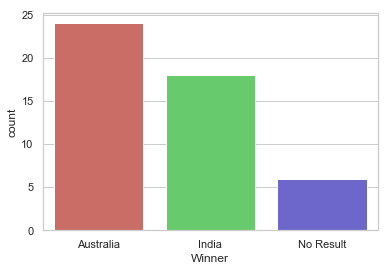

In [263]:
# now we have 43 rows which is the exact number of matched played by india and australia during 2006 to 2016
# Now lets explore the data

# lets visualize the dependent variable

sns.countplot(x='Winner',data=Final_ODI, palette='hls')
plt.show()

In [264]:
# Now we will see who has won most of the times
pd.DataFrame(Final_ODI.Winner.value_counts(normalize=True))

,Winner
Australia,0.500
India,0.375
No Result,0.125


In [265]:
# We see that Our dependent variable are imbalanced, and the ratio of India winning to Australia is 37:50.

# Before we go ahead to balance the dependent variable, let’s do some more exploration.

# Now we will see how many times matches were played between india and australia in which city
pd.DataFrame(Final_ODI.City.value_counts())

,City
Sydney,6
Nagpur,4
Chandigarh,4
Melbourne,4
Brisbane,4
Bangalore,3
Adelaide,2
Vadodara,2
Kuala Lumpur,2
Hyderabad,2


In [266]:
# now we will see what is the impact of toss decison on winning

Winner_Toss = Final_ODI.groupby("Toss_Decision").Winner.value_counts(normalize=True)

pd.DataFrame(Winner_Toss)

Winner
Toss_Decision Winner             
bat           Australia  0.527778
              India      0.361111
              No Result  0.111111
field         Australia  0.416667
              India      0.416667
              No Result  0.166667

In [267]:
# now we will visualise the able table using crossmatrix

Winner_Toss.unstack()

#  we see that when toss decision is bat the team wins most of the times

Winner,Australia,India,No Result
Toss_Decision,,,
bat,0.527778,0.361111,0.111111
field,0.416667,0.416667,0.166667


In [268]:
# now lets analyse the venue odi played between india and australia

pd.DataFrame(Final_ODI.groupby("City").Venue.value_counts())

Venue
City          Venue                                                    
Adelaide      Adelaide Oval                                           2
Ahmedabad     Sardar Patel Stadium, Motera                            1
Bangalore     M Chinnaswamy Stadium                                   3
Brisbane      Brisbane Cricket Ground, Woolloongabba                  4
Canberra      Manuka Oval                                             1
Centurion     SuperSport Park                                         1
Chandigarh    Punjab Cricket Association Stadium, Mohali              3
              Sector 16 Stadium                                       1
Chennai       M.A. Chidambaram Stadium                                1
Delhi         Feroz Shah Kotla                                        1
Guwahati      Nehru Stadium                                           1
Hyderabad     Rajiv Gandhi International Stadium, Uppal               2
Indore        Holkar Cricket Stadium                                  1
Jaipur        Sawai Mansingh Stadium                                  1
Kochi         Nehru Stadium                                           1
Kolkata       Eden Gardens                                            1
Kuala Lumpur  Kinrara Academy Oval                                    2
Melbourne     Melbourne Cricket Ground                                4
Mumbai        Wankhede Stadium                                        1
Nagpur        Vidarbha Cricket Association Stadium, Jamtha            3
              Vidarbha Cricket Association Ground                     1
Perth         Western Australia Cricket Association Ground            1
Pune          Maharashtra Cricket Association Stadium                 1
Ranchi        JSCA International Stadium Complex                      1
Sydney        Sydney Cricket Ground                                   6
Vadodara      Reliance Stadium                                        2
Visakhapatnam Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      1

In [269]:
# we see from the above venue, that nagpur has two cricket stadium with some what same name,
# it may be because of the data discripency
# But when we verified the data with the actual stadium we know that there are two stadium with this name, so the data is accurate

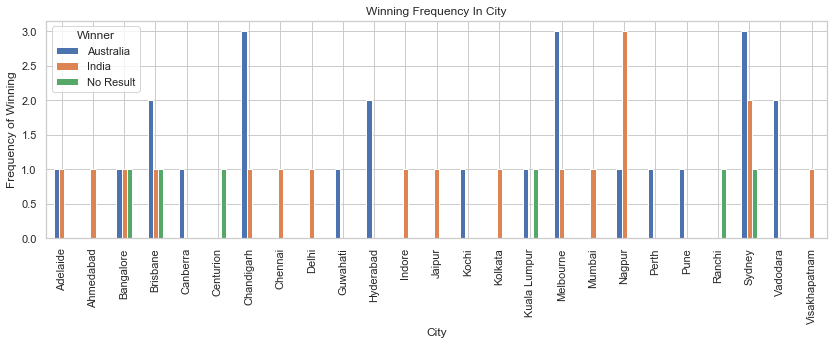

In [270]:
# Now lets see in which city india has won most of the time

pd.crosstab(Final_ODI.City,Final_ODI.Winner).plot(kind='bar',figsize=(14,4))
plt.title('Winning Frequency In City')
plt.xlabel('City')
plt.ylabel('Frequency of Winning')
plt.show()

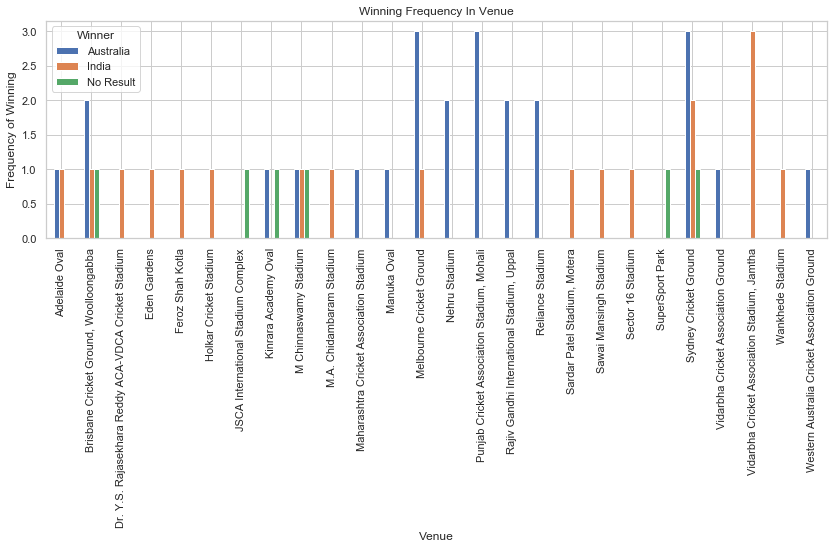

In [271]:
# we see that the frequescy of winning in city can be a good predictor
# we see that in nagpur india has won most of the time and australia in chandigarh for india cities

# now lets see the same for venue

pd.crosstab(Final_ODI.Venue,Final_ODI.Winner).plot(kind='bar',figsize=(14,4))
plt.title('Winning Frequency In Venue')
plt.xlabel('Venue')
plt.ylabel('Frequency of Winning')
plt.show()

In [272]:
# Now lets create additional column quarter from date column

Final_ODI["Quarter"] = Final_ODI["Dates"].apply(lambda x: x.quarter)

Final_ODI.sort_values(by=['Dates']).head()

,City,Dates,Winner,Man Of The Match,Toss_Decision,Toss_Winner,Venue,Team_Innings_1st innings_Australia,Team_Innings_1st innings_India,Team_Innings_2nd innings_Australia,...,Bowler_SW Tait,Bowler_TM Head,Bowler_UT Yadav,Bowler_V Kohli,Bowler_V Sehwag,Bowler_XJ Doherty,Bowler_YS Chahal,Bowler_Yuvraj Singh,Bowler_Z Khan,Quarter
25,Kuala Lumpur,2006-09-16,No Result,No One,bat,Australia,Kinrara Academy Oval,1,0,0,...,0,1,1,0,1,0,1,0,0,3
26,Kuala Lumpur,2006-09-22,Australia,B Lee,bat,Australia,Kinrara Academy Oval,1,0,0,...,0,1,1,0,1,0,0,0,0,3
12,Chandigarh,2006-10-29,Australia,DR Martyn,bat,India,"Punjab Cricket Association Stadium, Mohali",0,1,1,...,0,1,1,0,1,0,1,0,0,4
3,Bangalore,2007-09-29,No Result,No One,bat,Australia,M Chinnaswamy Stadium,1,0,0,...,0,0,0,0,0,0,0,1,1,3
23,Kochi,2007-10-02,Australia,BJ Haddin,field,India,Nehru Stadium,1,0,0,...,0,0,0,0,0,0,0,1,1,4


In [273]:
# now lets see in which quarter india has won most of the time

Winner_Quarter = Final_ODI.groupby("Quarter").Winner.value_counts()

Winner_Quarter.unstack()

# We see that australia has won equal number of time in 1st and 4th quarter, and India has won most in 4th quarter

Winner,Australia,India,No Result
Quarter,,,
1,11,6,2
3,2,3,3
4,11,9,1


In [274]:
# Now lets model the the algorithm to predict who will win the series

# So the first step is to convert the data into machine format

# first we need to remove the data column

ODI_Machine = Final_ODI.drop(columns='Dates')

ODI_Machine.head()

,City,Winner,Man Of The Match,Toss_Decision,Toss_Winner,Venue,Team_Innings_1st innings_Australia,Team_Innings_1st innings_India,Team_Innings_2nd innings_Australia,Team_Innings_2nd innings_India,...,Bowler_SW Tait,Bowler_TM Head,Bowler_UT Yadav,Bowler_V Kohli,Bowler_V Sehwag,Bowler_XJ Doherty,Bowler_YS Chahal,Bowler_Yuvraj Singh,Bowler_Z Khan,Quarter
0,Adelaide,Australia,MJ Clarke,bat,Australia,Adelaide Oval,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,Adelaide,India,G Gambhir,bat,Australia,Adelaide Oval,1,0,0,1,...,0,0,1,0,0,1,0,0,1,1
2,Ahmedabad,India,Yuvraj Singh,bat,Australia,"Sardar Patel Stadium, Motera",1,0,0,1,...,1,0,0,1,0,0,0,1,1,1
3,Bangalore,No Result,No One,bat,Australia,M Chinnaswamy Stadium,1,0,0,1,...,0,0,0,0,0,0,0,1,1,3
4,Bangalore,India,RG Sharma,field,Australia,M Chinnaswamy Stadium,0,1,1,0,...,0,0,0,0,0,1,0,0,0,4


In [275]:
# now we need to create the dependent variable with value 0 and 1 for creating ML model

# First we will remove the data with no result

ODI_Machine = ODI_Machine.loc[ODI_Machine['Winner'] != 'No Result']

print(ODI_Machine.shape)

(42, 201)


In [276]:
# Now we will create a new column Prediction with values 0 and 1.
# 0 will represend India and 1 will Represend Australia

ODI_Machine["Winner_Y"] = ODI_Machine['Winner'].apply(lambda x: 1 if x == 'Australia' else 0)

ODI_Machine.loc[:,["Winner","Winner_Y"]]

,Winner,Winner_Y
0,Australia,1
1,India,0
2,India,0
4,India,0
5,Australia,1
7,India,0
8,Australia,1
9,Australia,1
10,Australia,1
12,Australia,1


In [277]:
# Now we will remove the winner column

Final_Data = ODI_Machine.drop(columns=['Man Of The Match','Winner','Winner_Y','Team_Innings_1st innings_Australia','Team_Innings_2nd innings_Australia'])

Final_Data.head()

,City,Toss_Decision,Toss_Winner,Venue,Team_Innings_1st innings_India,Team_Innings_2nd innings_India,Batsman_A Symonds,Batsman_A Zampa,Batsman_AB Agarkar,Batsman_AC Agar,...,Bowler_SW Tait,Bowler_TM Head,Bowler_UT Yadav,Bowler_V Kohli,Bowler_V Sehwag,Bowler_XJ Doherty,Bowler_YS Chahal,Bowler_Yuvraj Singh,Bowler_Z Khan,Quarter
0,Adelaide,bat,Australia,Adelaide Oval,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,Adelaide,bat,Australia,Adelaide Oval,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
2,Ahmedabad,bat,Australia,"Sardar Patel Stadium, Motera",0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,1,1
4,Bangalore,field,Australia,M Chinnaswamy Stadium,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
5,Bangalore,bat,Australia,M Chinnaswamy Stadium,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,0,3


In [278]:
# Create dummy variables
# That is variables with only two values, zero and one.

Machine_Data = pd.get_dummies(Final_Data, drop_first=True)

print(Machine_Data.shape)
print(list(Machine_Data.columns))

(42, 240)
['Team_Innings_1st innings_India', 'Team_Innings_2nd innings_India', 'Batsman_A Symonds', 'Batsman_A Zampa', 'Batsman_AB Agarkar', 'Batsman_AC Agar', 'Batsman_AC Gilchrist', 'Batsman_AC Voges', 'Batsman_AJ Finch', 'Batsman_AM Rahane', 'Batsman_AR Patel', 'Batsman_AT Rayudu', 'Batsman_B Kumar', 'Batsman_B Lee', 'Batsman_BJ Haddin', 'Batsman_BJ Hodge', 'Batsman_BW Hilfenhaus', 'Batsman_CJ Ferguson', 'Batsman_CJ McKay', 'Batsman_CL White', 'Batsman_D Mongia', 'Batsman_DA Warner', 'Batsman_DE Bollinger', 'Batsman_DJ Hussey', 'Batsman_DR Martyn', 'Batsman_DT Christian', 'Batsman_G Gambhir', 'Batsman_GA Manou', 'Batsman_GB Hogg', 'Batsman_GD McGrath', 'Batsman_GJ Bailey', 'Batsman_GJ Maxwell', 'Batsman_Gurkeerat Singh', 'Batsman_HH Pandya', 'Batsman_HWR Cartwright', 'Batsman_Harbhajan Singh', 'Batsman_I Sharma', 'Batsman_IK Pathan', 'Batsman_JJ Bumrah', 'Batsman_JP Faulkner', 'Batsman_JR Hopes', 'Batsman_JW Hastings', 'Batsman_KD Karthik', 'Batsman_KM Jadhav', 'Batsman_KW Richardso

In [279]:
# now lets join the dependend variable to the machine data

Input_File = Machine_Data.join(ODI_Machine.Winner_Y)

Input_File.head()

,Team_Innings_1st innings_India,Team_Innings_2nd innings_India,Batsman_A Symonds,Batsman_A Zampa,Batsman_AB Agarkar,Batsman_AC Agar,Batsman_AC Gilchrist,Batsman_AC Voges,Batsman_AJ Finch,Batsman_AM Rahane,...,Venue_Reliance Stadium,"Venue_Sardar Patel Stadium, Motera",Venue_Sawai Mansingh Stadium,Venue_Sector 16 Stadium,Venue_Sydney Cricket Ground,Venue_Vidarbha Cricket Association Ground,"Venue_Vidarbha Cricket Association Stadium, Jamtha",Venue_Wankhede Stadium,Venue_Western Australia Cricket Association Ground,Winner_Y
0,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


### Over-sampling using SMOTE  
#### With our training data created, I’ll up-sample the India winning using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:  
#### Works by creating synthetic samples from the minor class (India) instead of creating copies.  
#### Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.  
#### We are going to implement SMOTE in Python.

In [280]:
X = Input_File.loc[:, Input_File.columns != 'Winner_Y']
y = Input_File.loc[:, Input_File.columns == 'Winner_Y']

In [281]:
# Importing the SMOTE library
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

In [282]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [283]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Winner_Y'])

C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [284]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of India winning in oversampled data",len(os_data_y[os_data_y['Winner_Y']==0]))
print("Number of Australia winning",len(os_data_y[os_data_y['Winner_Y']==1]))
print("Proportion of india winning data in oversampled data is ",len(os_data_y[os_data_y['Winner_Y']==0])/len(os_data_X))
print("Proportion of australia data in oversampled data is ",len(os_data_y[os_data_y['Winner_Y']==1])/len(os_data_X))

length of oversampled data is  32
Number of India winning in oversampled data 16
Number of Australia winning 16
Proportion of india winning data in oversampled data is  0.5
Proportion of australia data in oversampled data is  0.5


In [285]:
# Now we have a perfect balanced data! we have over-sampled only on the training data,
# because by oversampling only on the training data, none of the information in the test data is being used to create
# synthetic observations, therefore, no information will bleed from test data into the model training.

### Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. 
This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively  considering smaller and smaller sets of features.

In [286]:
data_final_vars=Input_File.columns.values.tolist()
y=['Winner_Y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False  True
  True False False False False False False False False False False False
 False False False  True  True False False False False  True False False
 False False False False False False False False False False False False
 False False False False  True False False  True  True False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False  True False
 False False False False False False False False False False  True False
 False False False False  True False  True False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False Fa

C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [287]:
# now we have get the final column for creating our model

Column_Data = {'Col_Name': data_final_vars[:-1],
              'Boolen_Val': rfe.support_}

In [288]:
# Now we need to convert the above into data frame so as to get the final columns

Column_File = pd.DataFrame.from_dict(Column_Data)

In [289]:
# The RFE has helped us select the following features:

Column_File['Col_Name'][Column_File['Boolen_Val'] == True].values

array(['Batsman_BJ Haddin', 'Batsman_Harbhajan Singh', 'Batsman_I Sharma',
       'Batsman_MG Johnson', 'Batsman_MJ Clarke', 'Batsman_MM Patel',
       'Batsman_R Dhawan', 'Batsman_R Vinay Kumar', 'Batsman_RA Jadeja',
       'Batsman_SR Tendulkar', 'Batsman_Z Khan', 'Bowler_BB Sran',
       'Bowler_DJ Hussey', 'Bowler_GB Hogg', 'Bowler_JJ Bumrah',
       'Bowler_MM Patel', 'Bowler_PP Chawla', 'Bowler_V Kohli',
       'City_Chandigarh',
       'Venue_Punjab Cricket Association Stadium, Mohali'], dtype=object)

In [290]:
cols=list(Column_File['Col_Name'][Column_File['Boolen_Val'] == True].values)

test = ['Bowler_V Kohli',	'Venue_Punjab Cricket Association Stadium, Mohali',	'Venue_Rajiv Gandhi International Stadium, Uppal',	'Venue_Vidarbha Cricket Association Stadium, Jamtha',	'Venue_Feroz Shah Kotla',	'Batsman_AJ Finch',	'Batsman_GJ Maxwell',	'Batsman_KD Karthik',	'Batsman_MS Dhoni',	'Batsman_NM Coulter-Nile',	'Batsman_R Sharma',	'Batsman_S Dhawan',	'Batsman_UT Yadav',	'Batsman_V Kohli',	'Bowler_AJ Finch',	'Bowler_GJ Maxwell',	'Bowler_KW Richardson',	'Bowler_NM Coulter-Nile',	'Bowler_NM Lyon',	'Bowler_PJ Cummins',	'Bowler_R Sharma',	'Bowler_UT Yadav',	'City_Hyderabad',	'City_Nagpur',	'City_Delhi',	'Batsman_BJ Haddin',	'Batsman_Harbhajan Singh',	'Batsman_I Sharma',	'Batsman_MG Johnson',	'Batsman_MJ Clarke',	'Batsman_MM Patel',	'Batsman_R Dhawan',	'Batsman_R Vinay Kumar',	'Batsman_RA Jadeja',	'Batsman_SR Tendulkar',	'Batsman_Z Khan',	'Bowler_BB Sran',	'Bowler_DJ Hussey',	'Bowler_GB Hogg',	'Bowler_JJ Bumrah',	'Bowler_MM Patel',	'Bowler_PP Chawla',	'City_Chandigarh']
dat = cols.append(test)
X=os_data_X[test]
y=os_data_y['Winner_Y']

In [291]:
# Now lets implement the model
# Logistic Regression Model Fitting

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\suresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [292]:
# Predicting the test set results and calculating the accuracy

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [293]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2 1]
 [0 4]]


In [294]:
# The result is telling us that we have 4+3 correct predictions and 2+0 incorrect predictions.

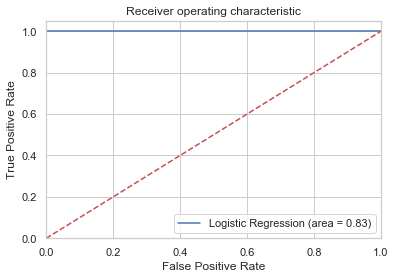

In [295]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [296]:
# save the model to disk
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(logreg, filename)

['finalized_model.sav']

In [297]:
# load the model from disk
loaded_model = joblib.load(filename)
Odi_test = pd.read_excel("Test_Input.xlsx")
result = loaded_model.predict(Odi_test)
print(result)

[1 0 0 1 0]


In [298]:
# So the above result shows that India will win the ODI series
# 1st ODI will win by Australia
# 2nd ODI will win by India
# 3rd ODI will win by India
# 4th ODI will win by Australia
# 5th ODI will win by India

In [299]:
# Now let us analyse who will be the Highest run scorer for the series

# for this information we will be requiring the bowling and over data from the main datasets

Batsman_MedianRun = RawDataSets.groupby(['Batsman'],as_index=False).Batsman_Runs.median()
Batsman_Mean = RawDataSets.groupby(['Batsman'],as_index=False).Batsman_Runs.mean()
Batsman_TotalRun = RawDataSets.groupby(['Batsman'],as_index=False).Batsman_Runs.sum()

Batsman_MedianRun.sort_values(by=['Batsman_Runs'], ascending=False).head(10)

,Batsman,Batsman_Runs
53,MK Pandey,12.0
55,ML Hayden,10.5
22,DJ Hussey,9.5
7,AJ Finch,9.0
29,GJ Bailey,9.0
83,RR Powar,8.5
86,S Dhawan,8.0
80,RG Sharma,8.0
92,SPD Smith,7.5
49,MEK Hussey,7.0


In [300]:
Batsman_TotalRun.sort_values(by=['Batsman_Runs'], ascending=False).head(10)

,Batsman,Batsman_Runs
80,RG Sharma,1593
60,MS Dhoni,1355
100,V Kohli,1182
94,SR Tendulkar,920
84,RT Ponting,876
7,AJ Finch,830
49,MEK Hussey,753
95,SR Watson,717
29,GJ Bailey,710
20,DA Warner,636


In [301]:
Batsman_Mean.sort_values(by=['Batsman_Runs'], ascending=False).head(10)

,Batsman,Batsman_Runs
32,HH Pandya,44.400000
58,MP Stoinis,30.600000
42,KM Jadhav,27.600000
98,TM Head,23.800000
53,MK Pandey,14.846154
20,DA Warner,14.133333
80,RG Sharma,13.852174
7,AJ Finch,13.387097
8,AM Rahane,12.675676
92,SPD Smith,12.180000


## We can see that from all the highest scorer none has the mean and median coming under top 10 except for Rohit Sharma, So we can safely say that Rohit Sharma will the highest run scorer

In [302]:
# Next we have predict who will be the Highest wicket-taker

Bowler_MedianWicket = RawDataSets.groupby(['Bowler'],as_index=False).Wicket.median()
Bowler_MeanWicket = RawDataSets.groupby(['Bowler'],as_index=False).Wicket.mean()
Bowler_TotalWicket = RawDataSets.groupby(['Bowler'],as_index=False).Wicket.sum()

Bowler_TotalWicket.sort_values(by=['Wicket'], ascending=False).head(10)

,Bowler,Wicket
44,MG Johnson,29
11,B Lee,23
26,Harbhajan Singh,23
27,I Sharma,20
28,IK Pathan,19
79,UT Yadav,18
15,CJ McKay,16
69,S Sreesanth,15
32,JP Faulkner,15
63,R Vinay Kumar,15


In [303]:
Bowler_MeanWicket.sort_values(by=['Wicket'], ascending=False).head(10)

,Bowler,Wicket
39,Kuldeep Yadav,1.400000
25,HH Pandya,1.200000
83,YS Chahal,1.200000
51,NM Coulter-Nile,1.000000
3,A Zampa,0.800000
38,KW Richardson,0.500000
30,JJ Bumrah,0.428571
48,MP Stoinis,0.400000
37,KM Jadhav,0.400000
57,PJ Cummins,0.400000


In [304]:
Bowler_MedianWicket.sort_values(by=['Wicket'], ascending=False).head(10)

,Bowler,Wicket
0,A Mishra,0
54,NW Bracken,0
62,R Sharma,0
61,R Dhawan,0
60,R Ashwin,0
59,PP Chawla,0
58,PM Siddle,0
57,PJ Cummins,0
56,P Kumar,0
55,None,0


We see that UT Yadav has the highest wicket in the last ODI.
we will go with **_UT Yadav_** for the highest wicket tacker

In [305]:
# Now let us analyse who will hit the maximun sixes in this odi

Batsman_TotalSixes = RawDataSets.groupby(['Batsman'],as_index=False).Sixes.sum()

Batsman_TotalSixes.sort_values(by=['Sixes'], ascending=False).head()

,Batsman,Sixes
80,RG Sharma,66
8,AM Rahane,31
30,GJ Maxwell,28
60,MS Dhoni,27
95,SR Watson,19


In [306]:
Batsman_MeanSixes = RawDataSets.groupby(['Batsman'],as_index=False).Sixes.mean()

Batsman_MeanSixes.sort_values(by=['Sixes'], ascending=False).head()

,Batsman,Sixes
32,HH Pandya,2.400000
58,MP Stoinis,1.200000
8,AM Rahane,0.837838
80,RG Sharma,0.573913
30,GJ Maxwell,0.509091


From the above analysis we can safely say that **_Rohit Sharma_** will hit the maximum numer of sixes

In [307]:
# Now lets see who will hit the maximun number of 4's in the series

Batsman_TotalFour = RawDataSets.groupby(['Batsman'],as_index=False).Fours.sum()

Batsman_TotalFour.sort_values(by=['Fours'], ascending=False).head(10)

,Batsman,Fours
80,RG Sharma,121
100,V Kohli,110
94,SR Tendulkar,104
60,MS Dhoni,92
95,SR Watson,89
7,AJ Finch,87
84,RT Ponting,86
86,S Dhawan,78
55,ML Hayden,71
20,DA Warner,65


In [308]:
Batsman_MedianFour = RawDataSets.groupby(['Batsman'],as_index=False).Fours.median()

Batsman_MedianFour.sort_values(by=['Fours'], ascending=False).head(10)

,Batsman,Fours
53,MK Pandey,1.0
55,ML Hayden,1.0
86,S Dhawan,1.0
92,SPD Smith,1.0
95,SR Watson,1.0
7,AJ Finch,1.0
97,TD Paine,1.0
59,MR Marsh,1.0
19,D Mongia,1.0
72,PP Chawla,0.5


In [309]:
Batsman_MeanFour = RawDataSets.groupby(['Batsman'],as_index=False).Fours.mean()

Batsman_MeanFour.sort_values(by=['Fours'], ascending=False).head(10)

,Batsman,Fours
42,KM Jadhav,3.000000
32,HH Pandya,2.600000
58,MP Stoinis,2.400000
98,TM Head,2.000000
53,MK Pandey,1.538462
20,DA Warner,1.444444
7,AJ Finch,1.403226
55,ML Hayden,1.365385
86,S Dhawan,1.238095
92,SPD Smith,1.160000


From the above analysis for the number of 4's hit by any batsman, we find that though both "_RG Sharma_" and "_V Kohli_" has the highest number of fours against Australia, but their mean and median are not supporting their consistent score.  
So, we will go with **_AJ Finch_** since his mean and meadian all are under top 10
### AJ Finch the highest number of 4's in the series